In [77]:
#import thư viện
from cmath import nan
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , RobustScaler, StandardScaler
import warnings
import re
import time
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

# Đọc dữ liệu 

Đọc dataset1

In [78]:
#dataset1
df1=pd.read_csv('data_UsedMotor.csv')
df1
# df1.describe()
# df1.info()

,name,price,Odometer,Ground Clearance,Unnamed: 4,Electric Start,Type Approval,Fuel System,Throttle,Compression Ratio,...,"Wheels Type, Rear","Brakes, Caliper Type",ABS Option,Drive System,Power System Type,Transmission/Final Drive,Engine Mount,Towing Capacity,Cruise Control Option,Color/Graphics
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022 Can-Am® RYKER S,"$11,995",35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022 Harley-Davidson® FLHTK - Ultra Limited,"$31,995",5.0,5.3 in.,NaN,NaN,NaN,Electronic Sequential Port Fuel Injection (ESPFI),NaN,10.5:1,...,Slicer II cast aluminum with clear coat,"32 mm, 4-piston fixed front and rear",Standard,NaN,NaN,NaN,NaN,NaN,Standard,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,1995 Harley-Davidson® FXDL - Dyna® Low Rider®,"$4,499",8931.0,NaN,NaN,NaN,NaN,Carburetor,Cable operated,8.5:1,...,NaN,NaN,NaN,NaN,NaN,NaN,Transverse,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,1995 Yamaha VMX12,"$4,995",8937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Xóa các phần từ NaN do việc cào data có lỗi.

In [79]:
df1=df1.dropna(subset=['name'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 1 to 2131
Columns: 204 entries, name to Color/Graphics
dtypes: float64(4), object(200)
memory usage: 1.7+ MB


Đọc dataset2

In [80]:
#dataset2
df2=pd.read_csv('data_autosocout24.csv', )
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Empty weight             48 non-null     object 
 1   Last timing belt change  4 non-null      object 
 2   General inspection       111 non-null    object 
 3   Offer number             201 non-null    object 
 4   Warranty                 31 non-null     object 
 5   Body type                398 non-null    object 
 6   Paint                    77 non-null     object 
 7   Gearbox                  227 non-null    object 
 8   Cylinders                94 non-null     float64
 9   Fuel type                395 non-null    object 
 10  Gears                    95 non-null     float64
 11  Type                     398 non-null    object 
 12  Mileage                  395 non-null    object 
 13  Full service history     82 non-null     object 
 14  Manufacturer colour      2

Với dataset1 chọn các cột: Price, Displacement, Odometer, Fuel Economy: Combined City/Hwy, Year, 'Weight, In Running Order', Engine Torque, Fuel Capacity


In [81]:
data1 =  df1[["price", "Displacement", "Odometer", "Fuel Economy: Combined City/Hwy", "Year", "Weight, In Running Order", 'Engine Torque', 'Fuel Capacity']]
data1

,price,Displacement,Odometer,Fuel Economy: Combined City/Hwy,Year,"Weight, In Running Order",Engine Torque,Fuel Capacity
1,"$11,995",NaN,35.0,NaN,2022.0,NaN,NaN,NaN
3,"$31,995","114 cu in (1,868 cc)",5.0,43 mpg (5.5 l/100 km),2022.0,917 lb. (416 kg),122 ft-lb (166 Nm),6 gal. (22.7 l)
5,"$33,995","114 cu in (1,868 cc)",81.0,43 mpg (5.5 l/100 km),2022.0,853 lb. (387 kg),118 ft-lb (160 Nm),6 gal. (22.7 l)
7,Click for a Quote,"117 cu in (1,923 cc)",1354.0,47 mpg (5 l/100 km),2022.0,721 lb. (327 kg),125 ft-lb (169 Nm),5 gal. (18.9 l)
9,"$7,499",249cc,NaN,NaN,2022.0,NaN,NaN,1.64 gal
...,...,...,...,...,...,...,...,...
2123,"$2,499",NaN,NaN,NaN,1998.0,NaN,NaN,NaN
2125,"$5,999",NaN,19138.0,NaN,1997.0,NaN,NaN,NaN
2127,"$4,499",1338 cc (81.75 in),8931.0,NaN,1995.0,NaN,NaN,18.9 l
2129,"$4,995",NaN,8937.0,NaN,1995.0,NaN,NaN,NaN


# Xử lí dataset1




Đổi tên các cột


In [82]:
data1.rename(columns={'Fuel Economy: Combined City/Hwy':'Fuel Economy'}, inplace=True)
data1.rename(columns={'Weight, In Running Order':'Weight'}, inplace=True)
# data1.info()
# data1.describe()
data1

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
1,"$11,995",NaN,35.0,NaN,2022.0,NaN,NaN,NaN
3,"$31,995","114 cu in (1,868 cc)",5.0,43 mpg (5.5 l/100 km),2022.0,917 lb. (416 kg),122 ft-lb (166 Nm),6 gal. (22.7 l)
5,"$33,995","114 cu in (1,868 cc)",81.0,43 mpg (5.5 l/100 km),2022.0,853 lb. (387 kg),118 ft-lb (160 Nm),6 gal. (22.7 l)
7,Click for a Quote,"117 cu in (1,923 cc)",1354.0,47 mpg (5 l/100 km),2022.0,721 lb. (327 kg),125 ft-lb (169 Nm),5 gal. (18.9 l)
9,"$7,499",249cc,NaN,NaN,2022.0,NaN,NaN,1.64 gal
...,...,...,...,...,...,...,...,...
2123,"$2,499",NaN,NaN,NaN,1998.0,NaN,NaN,NaN
2125,"$5,999",NaN,19138.0,NaN,1997.0,NaN,NaN,NaN
2127,"$4,499",1338 cc (81.75 in),8931.0,NaN,1995.0,NaN,NaN,18.9 l
2129,"$4,995",NaN,8937.0,NaN,1995.0,NaN,NaN,NaN


Hàm xem các định dạng sau số

In [83]:
def find_format(temp):
  pattern_cc = "(\D+) "
  results_cc = re.findall(pattern_cc, temp)
  return results_cc
last_rs = []
temp = list(data1['Weight'])
for i in temp:
  rs = find_format(str(i))
  for k in rs:
    last_rs.append(k)
set(last_rs)

{' kg /', ' lb.', ' lbs', ' lbs /', ' lbs.'}

Đưa cột price về giá trị số với định dạng float(Các giá trị không phải giá tiền sẽ chuyển thành Nan)

In [84]:
data1["price"] = data1["price"].apply(lambda x: x.replace("$","") if x[0] == "$" else "")
data1["price"] = data1["price"].apply(lambda x: round(float(x.replace(",","").strip()), 3) if x != "" else None)
data1
# data1.info()
# data1.describe()

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
1,11995.0,NaN,35.0,NaN,2022.0,NaN,NaN,NaN
3,31995.0,"114 cu in (1,868 cc)",5.0,43 mpg (5.5 l/100 km),2022.0,917 lb. (416 kg),122 ft-lb (166 Nm),6 gal. (22.7 l)
5,33995.0,"114 cu in (1,868 cc)",81.0,43 mpg (5.5 l/100 km),2022.0,853 lb. (387 kg),118 ft-lb (160 Nm),6 gal. (22.7 l)
7,NaN,"117 cu in (1,923 cc)",1354.0,47 mpg (5 l/100 km),2022.0,721 lb. (327 kg),125 ft-lb (169 Nm),5 gal. (18.9 l)
9,7499.0,249cc,NaN,NaN,2022.0,NaN,NaN,1.64 gal
...,...,...,...,...,...,...,...,...
2123,2499.0,NaN,NaN,NaN,1998.0,NaN,NaN,NaN
2125,5999.0,NaN,19138.0,NaN,1997.0,NaN,NaN,NaN
2127,4499.0,1338 cc (81.75 in),8931.0,NaN,1995.0,NaN,NaN,18.9 l
2129,4995.0,NaN,8937.0,NaN,1995.0,NaN,NaN,NaN


Đổi đơn vị của cột Displacement(Dung tích xi lanh) về chung là cc và chuyển kiểu thành float

In [85]:
def convertCC(temp):
  pattern_cc = "(\d+|\d+.\d+)(?= cc|cc)"
  results_cc = re.findall(pattern_cc, temp)
  pattern_cu_in = "(\d+|\d+.\d+)(?= cu in| cu. in.|in.|ci)"
  results_cu_in = re.findall(pattern_cu_in, temp)
  pattern_cm = "(\d+|\d+.\d+)(?= cm³)"
  results_cm = re.findall(pattern_cm, temp)
  if len(results_cc) > 0:
    return round(float(results_cc[0]) ,3)
  if len(results_cu_in) > 0:
    return round(float(results_cu_in[0])*16.387, 3)#1cu_in = 16,387cc
  if len(results_cm) > 0:
    return round(float(results_cm[0]), 3)#1cm3 = 1cc
  return None

data1["Displacement"] = data1["Displacement"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data1["Displacement"] = data1["Displacement"].apply(lambda x: convertCC(x) if x != None and type(x) == str else x)
# data1.info()
data1.describe()
# data1

,price,Displacement,Odometer,Year
count,1006.000000,818.000000,893.000000,934.000000
mean,14772.353877,1543.278314,19938.193729,2012.414347
std,7454.506739,344.659591,18311.574308,6.609183
min,995.000000,1.301000,1.000000,1976.000000
25%,9495.000000,1449.000000,5790.000000,2008.000000
50%,13497.000000,1687.861000,14315.000000,2014.000000
75%,18995.000000,1746.000000,29960.000000,2018.000000
max,44995.000000,2458.000000,100743.000000,2022.000000


Note:
https://www.meridianhonda.com/blog/whats-difference-city-highway-mpg/: City MPG is valued at 55% and highway MPG is valued at 45%. These two numbers are combined to give you the combined MPG.

Đổi đơn vị của cột Fuel consumption(Lượng nhiên liệu tiêu thụ) về chung là mpg và chuyển kiểu thành float

In [86]:
def convertMPG(temp):
  pattern_mpg = "(\d+|\d+.\d+)(?= mpg| MPG| miles per gallon)"
  results_mpg = re.findall(pattern_mpg, temp)
  pattern_fl = "\d+|\d+.\d+"
  results_fl = re.findall(pattern_fl, temp)
  if len(results_mpg) == 1 and '/' not in results_mpg[0]:
    return round(float(results_mpg[0]), 3)
  if len(results_fl) > 1:
    return round(float(results_fl[0])*0.55 + float(results_fl[1])*0.45, 3)
  return None

# print(convertMPG('per 100 km: 52 mpg at a constant 56 mph'))
data1["Fuel Economy"] = data1["Fuel Economy"].apply(lambda x: convertMPG(x) if x != None and type(x) == str else x)
# data1.info()
data1.describe()
# data1

,price,Displacement,Odometer,Fuel Economy,Year
count,1006.000000,818.000000,893.000000,689.000000,934.000000
mean,14772.353877,1543.278314,19938.193729,43.239448,2012.414347
std,7454.506739,344.659591,18311.574308,6.021940,6.609183
min,995.000000,1.301000,1.000000,2.000000,1976.000000
25%,9495.000000,1449.000000,5790.000000,42.000000,2008.000000
50%,13497.000000,1687.861000,14315.000000,43.000000,2014.000000
75%,18995.000000,1746.000000,29960.000000,45.000000,2018.000000
max,44995.000000,2458.000000,100743.000000,114.150000,2022.000000


Đổi đơn vị của cột Weight(Khối lượng bản thân) về chung là lb(pound) và chuyển kiểu thành float

In [87]:
def convertLB(temp):
  pattern_lb = "(\d+|\d+.\d+)(?= lb.| lbs| lbs.)"
  results_lb = re.findall(pattern_lb, temp)
  if len(results_lb) > 0:
    return round(float(results_lb[0]), 3)
  return None

data1["Weight"] = data1["Weight"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data1["Weight"] = data1["Weight"].apply(lambda x: convertLB(x) if x != None and type(x) == str else x)
# data1.info()
data1.describe()
# data1

,price,Displacement,Odometer,Fuel Economy,Year,Weight
count,1006.000000,818.000000,893.000000,689.000000,934.000000,676.000000
mean,14772.353877,1543.278314,19938.193729,43.239448,2012.414347,773.290444
std,7454.506739,344.659591,18311.574308,6.021940,6.609183,128.527425
min,995.000000,1.301000,1.000000,2.000000,1976.000000,489.000000
25%,9495.000000,1449.000000,5790.000000,42.000000,2008.000000,676.000000
50%,13497.000000,1687.861000,14315.000000,43.000000,2014.000000,789.000000
75%,18995.000000,1746.000000,29960.000000,45.000000,2018.000000,870.000000
max,44995.000000,2458.000000,100743.000000,114.150000,2022.000000,1243.000000


Đổi đơn vị của cột Engine Torque(Momen xoắn) về chung là ft-lb(Foot-pound force) và chuyển kiểu thành float

In [88]:
def convertFT_LB(temp):
  pattern_lb = "(\d+|\d+.\d+)(?= ft-lb| lb-ft| ft-lbs|FT-lbs| ft. lbs.| ft.lbs)"
  results_lb = re.findall(pattern_lb, temp)
  pattern_nm = "(\d+|\d+.\d+)(?= Nm)"
  results_nm = re.findall(pattern_nm, temp)
  if len(results_lb) > 0:
    if len(results_lb[0].split(' ')) > 1:
      return round(float(results_lb[0].split(' ')[1]), 3)
    return round(float(results_lb[0]), 3)
  if len(results_nm) > 0:
    return round(float(results_nm[0])*0.738, 3)
  return None

data1["Engine Torque"] = data1["Engine Torque"].apply(lambda x: convertFT_LB(x) if x != None and type(x) == str else x)
# data1.info()
# data1.describe()
data1
# convertFT_LB('106 Nm (10.81 kg-m) @ 3200 rpm')

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
1,11995.0,NaN,35.0,NaN,2022.0,NaN,NaN,NaN
3,31995.0,1868.0,5.0,43.0,2022.0,917.0,122.000,6 gal. (22.7 l)
5,33995.0,1868.0,81.0,43.0,2022.0,853.0,118.000,6 gal. (22.7 l)
7,NaN,1923.0,1354.0,47.0,2022.0,721.0,125.000,5 gal. (18.9 l)
9,7499.0,249.0,NaN,NaN,2022.0,NaN,NaN,1.64 gal
...,...,...,...,...,...,...,...,...
2123,2499.0,NaN,NaN,NaN,1998.0,NaN,NaN,NaN
2125,5999.0,NaN,19138.0,NaN,1997.0,NaN,NaN,NaN
2127,4499.0,1338.0,8931.0,NaN,1995.0,NaN,NaN,18.9 l
2129,4995.0,NaN,8937.0,NaN,1995.0,NaN,NaN,NaN


Đổi đơn vị của cột Fuel Capacity(Dung tích bình nhiên liệu) về chung là gal(Gallon) và chuyển kiểu thành float

In [89]:
def convertGal(temp):
  pattern_gal = "(\d+|\d+.\d+)(?= gal| gallons| us gallon)"
  results_gal = re.findall(pattern_gal, temp)
  pattern_l = "(\d+|\d+.\d+)(?= l)"
  results_l = re.findall(pattern_l, temp)
  if len(results_gal) > 0:
    return round(float(results_gal[0]), 3)
  if len(results_l) > 0:
    return round(float(results_l[0]) * 0.26, 3)
  return None

data1["Fuel Capacity"] = data1["Fuel Capacity"].apply(lambda x: convertGal(x) if x != None and type(x) == str else x)
# data1.info()
data1.describe()
# data1
# convertGal('Fuel Capacity 4.8  (18.2 l)')

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
count,1006.000000,818.000000,893.000000,689.000000,934.000000,676.000000,759.000000,832.000000
mean,14772.353877,1543.278314,19938.193729,43.239448,2012.414347,773.290444,97.333041,5.114974
std,7454.506739,344.659591,18311.574308,6.021940,6.609183,128.527425,18.332097,1.039249
min,995.000000,1.301000,1.000000,2.000000,1976.000000,489.000000,0.000000,0.500000
25%,9495.000000,1449.000000,5790.000000,42.000000,2008.000000,676.000000,92.000000,4.700000
50%,13497.000000,1687.861000,14315.000000,43.000000,2014.000000,789.000000,100.000000,5.000000
75%,18995.000000,1746.000000,29960.000000,45.000000,2018.000000,870.000000,110.000000,6.000000
max,44995.000000,2458.000000,100743.000000,114.150000,2022.000000,1243.000000,129.000000,10.600000


# Xử lí dataset2

Với dataset2 chọn các cột: price, Engine size, Mileage

---

Empty weight

In [90]:
data2 =  df2[["price", "Engine size", "Mileage", "Empty weight"]]
data2

,price,Engine size,Mileage,Empty weight
0,"€ 11,350.-","1,200 cc","15,000 km",NaN
1,"€ 2,000.-",750 cc,"48,000 km",NaN
2,€ 450.-,49 cc,"1,649 km",NaN
3,"€ 2,550.-",49 cc,49 km,NaN
4,"€ 5,000.-",NaN,"1,050 km",NaN
...,...,...,...,...
393,"€ 1,500.-",NaN,"1,500 km",NaN
394,"€ 5,000.-",400 cc,"9,200 km",NaN
395,€ 600.-,150 cc,"8,000 km",NaN
396,"€ 4,400.-",998 cc,"10,900 km",222 kg


Đổi tên các cột cho tương ứng với dataset1

In [91]:
data2.rename(columns={'Mileage':'Odometer'}, inplace=True)
data2.rename(columns={'Engine size':'Displacement'}, inplace=True)
data2.rename(columns={'Empty weight':'Weight'}, inplace=True)
# data2.info()
data2.describe()
# data2

,price,Displacement,Odometer,Weight
count,398,323,395,48
unique,237,108,297,40
top,"€ 7,290.-",125 cc,0 km,240 kg
freq,15,45,19,3


Đổi đơn vị của price về Dollars và chuyển về kiểu float

In [92]:
def convertDollar(temp):
  pattern_doll = "(\d+|\d+.\d+)"
  results_doll = re.findall(pattern_doll, temp)
  if len(results_doll) > 0:
    return round(float(results_doll[0])*1.05, 3) #1euro = 1.05 dollar
  return None

data2["price"] = data2["price"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data2["price"] = data2["price"].apply(lambda x: convertDollar(x) if x != None and type(x) == str else x)
# data2.info()
data2.describe()
# data2

,price
count,398.000000
mean,8004.981030
std,6013.753356
min,472.500000
25%,4093.950000
50%,6300.000000
75%,10368.750000
max,38850.000000


Đổi đơn vị của Displacement thành cc và chuyển về kiểu float

In [93]:
data2["Displacement"] = data2["Displacement"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data2["Displacement"] = data2["Displacement"].apply(lambda x: convertCC(x) if x != None and type(x) == str else x)
# data2.info()
data2.describe()
# data2

,price,Displacement
count,398.000000,323.000000
mean,8004.981030,723.990712
std,6013.753356,583.562823
min,472.500000,0.000000
25%,4093.950000,279.500000
50%,6300.000000,689.000000
75%,10368.750000,1046.500000
max,38850.000000,7690.000000


Đổi đơn vị của Odometer thành km và chuyển về kiểu float

In [94]:
def convertKM(temp):
  pattern_doll = "(\d+|\d+.\d+)"
  results_doll = re.findall(pattern_doll, temp)
  if len(results_doll) > 0:
    return round(float(results_doll[0]), 3) 
  return None

data2["Odometer"] = data2["Odometer"].apply(lambda x: x.replace(",","") if type(x) == str else x)
data2["Odometer"] = data2["Odometer"].apply(lambda x: convertKM(x) if x != None and type(x) == str else x)
# data2.info()
data2.describe()
# data2

,price,Displacement,Odometer
count,398.000000,323.000000,395.000000
mean,8004.981030,723.990712,21305.341772
std,6013.753356,583.562823,23869.575498
min,472.500000,0.000000,0.000000
25%,4093.950000,279.500000,3150.500000
50%,6300.000000,689.000000,13758.000000
75%,10368.750000,1046.500000,32528.000000
max,38850.000000,7690.000000,195491.000000


Đổi đơn vị của Weight thành lb(pound) và chuyển về kiểu float

In [95]:
def convertWeight(temp):
  pattern_doll = "(\d+|\d+.\d+)(?= kg)"
  results_doll = re.findall(pattern_doll, temp)
  if len(results_doll) > 0:
    return round(float(results_doll[0])*2.205, 3) #1kg = 2.205 pound
  return None

data2["Weight"] = data2["Weight"].apply(lambda x: convertWeight(x) if x != None and type(x) == str else x)
# data2.info()
data2.describe()
# data2

,price,Displacement,Odometer,Weight
count,398.000000,323.000000,395.000000,48.000000
mean,8004.981030,723.990712,21305.341772,494.884687
std,6013.753356,583.562823,23869.575498,162.089859
min,472.500000,0.000000,0.000000,211.680000
25%,4093.950000,279.500000,3150.500000,389.182500
50%,6300.000000,689.000000,13758.000000,481.792500
75%,10368.750000,1046.500000,32528.000000,534.712500
max,38850.000000,7690.000000,195491.000000,985.635000


# Kết hợp 2 dataset và thực hiện làm sạch dữ liệu

Nối 2 dataset với nhau

In [96]:
data = data1.append(data2, ignore_index=True)
# data
data.info()
# data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1404 non-null   float64
 1   Displacement   1141 non-null   float64
 2   Odometer       1288 non-null   float64
 3   Fuel Economy   689 non-null    float64
 4   Year           934 non-null    float64
 5   Weight         724 non-null    float64
 6   Engine Torque  759 non-null    float64
 7   Fuel Capacity  832 non-null    float64
dtypes: float64(8)
memory usage: 91.6 KB


Các hàm làm sạch dữ liệu

In [97]:
def processing_technique(name_tech, columns):
    data_temp = data.copy()
    if name_tech == 'MEAN_VALUE':
        mean = data_temp[columns].mean()
        data_temp[columns] = data_temp[columns].fillna(mean)
    if name_tech == 'MEDIAN_VALUE':
        median = data_temp[columns].median()
        data_temp[columns] = data_temp[columns].fillna(median)
    if name_tech == 'MODE_VALUE':
        mode = data_temp[columns].mode()[0]
        data_temp[columns] = data_temp[columns].fillna(mode)
    if name_tech == 'RANDOM_VALUE':
        random = data_temp[columns].dropna().sample(n=data_temp[columns].isnull().sum(),random_state=0)
        random.index = data_temp[data_temp[columns].isnull()].index
        data_temp[columns].update(random)
    return data_temp
  
data = processing_technique("RANDOM_VALUE", "price")#phân phối chuẩn
data = processing_technique("RANDOM_VALUE", "Displacement")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Odometer")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Fuel Economy")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Year")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Weight")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Engine Torque")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Fuel Capacity")#phân phối lệch
# data
# data.info()
data.describe()

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,12848.499180,1311.561256,20357.466615,43.239448,2012.426230,754.832604,97.331307,5.106900
std,7668.102181,578.846829,18927.061804,4.129605,6.606509,104.116146,18.310157,1.042441
min,472.500000,0.000000,0.000000,2.000000,1976.000000,211.680000,0.000000,0.500000
25%,6999.000000,937.000000,6266.750000,43.000000,2008.000000,754.832604,92.000000,4.700000
50%,11549.475000,1573.152000,18165.500000,43.239448,2014.000000,754.832604,100.000000,5.000000
75%,16999.000000,1689.500000,27655.000000,43.239448,2018.000000,755.000000,110.000000,6.000000
max,44995.000000,7690.000000,195491.000000,114.150000,2022.000000,1243.000000,129.000000,10.600000


Xử lí biệt lệ

Hàm vẽ đồ thị kiểm tra phân phối

In [98]:
fontdict = {"fontsize": 16, "fontweight": "bold"}

def distribution_chart(col):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    sns.histplot(data=data, x=col, ax=axes[0])
    axes[0].set_title(f"{col} Distribution - Histogram", fontdict=fontdict)

    sns.kdeplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"{col} Distribution - Kdeplot", fontdict=fontdict) 
    plt.show(fig)

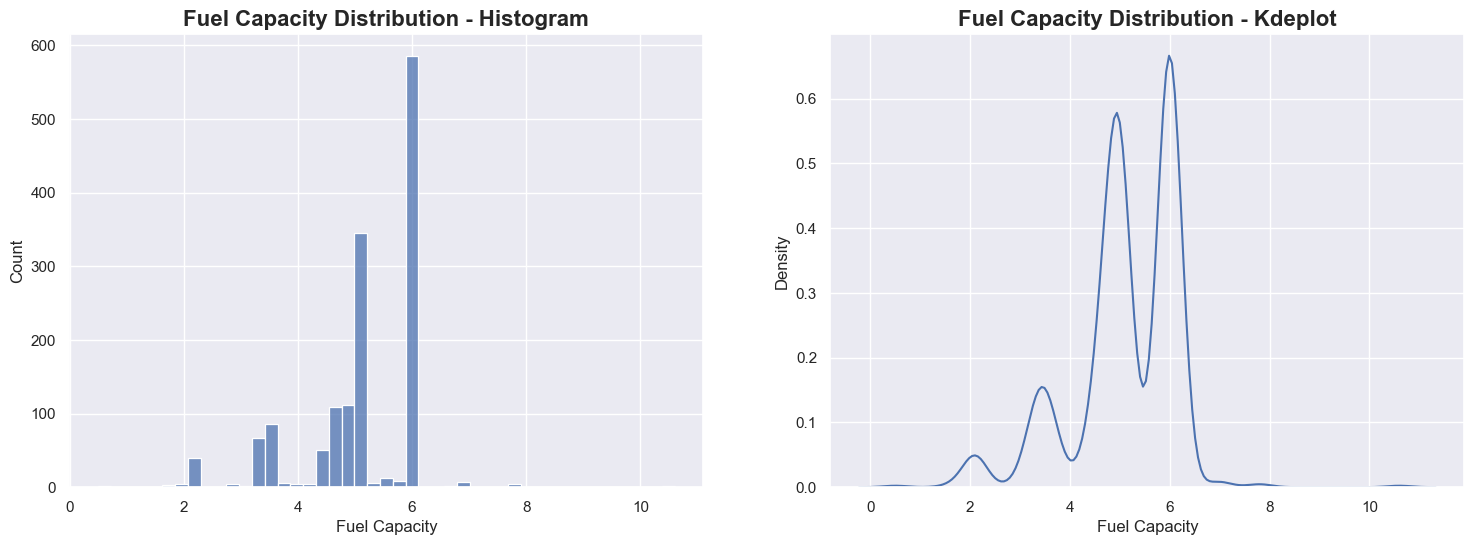

In [99]:
distribution_chart("Fuel Capacity")

Xử lý ngoại lệ

In [100]:
#True danh cho phan bo chuan, False danh cho phan bo Lech
def exception_handling(column, cd, data):
  if cd == True:
    upper_column = data[column].mean() + 3* data[column].std()
    lower_column = data[column].mean() - 3* data[column].std()
    data.loc[data[column] >= round(upper_column), column] = round(upper_column)
    data.loc[data[column] <= round(lower_column), column] = round(lower_column)
  else:
    q1, q3 = np.percentile(data[column], [25, 75])  
    IQR = q3 - q1
    upper_column = q3 + 3 * IQR
    lower_column = q1 - 3 * IQR
    data.loc[data[column] >= upper_column, column] = round(upper_column)
    data.loc[data[column] <= lower_column, column] = round(lower_column)
  return data
  
data = exception_handling("price", True, data)
data = exception_handling("Displacement", False, data)
data = exception_handling("Odometer", False, data)
data = exception_handling("Fuel Economy", False, data) 
data = exception_handling("Year", False, data)
data = exception_handling("Weight", False, data)
data = exception_handling("Engine Torque", False, data)
data = exception_handling("Fuel Capacity", False, data)
data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1464 non-null   float64
 1   Displacement   1464 non-null   float64
 2   Odometer       1464 non-null   float64
 3   Fuel Economy   1464 non-null   float64
 4   Year           1464 non-null   float64
 5   Weight         1464 non-null   float64
 6   Engine Torque  1464 non-null   float64
 7   Fuel Capacity  1464 non-null   float64
dtypes: float64(8)
memory usage: 91.6 KB


,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
count,1464.00000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,12792.56612,1306.447868,20213.593664,43.072556,2012.428962,754.924267,97.418056,5.106764
std,7474.31254,537.507702,18029.646605,0.630984,6.591831,0.706062,17.963383,1.035475
min,472.50000,0.000000,0.000000,42.000000,1978.000000,754.000000,38.000000,1.000000
25%,6999.00000,937.000000,6266.750000,43.000000,2008.000000,754.832604,92.000000,4.700000
50%,11549.47500,1573.152000,18165.500000,43.239448,2014.000000,754.832604,100.000000,5.000000
75%,16999.00000,1689.500000,27655.000000,43.239448,2018.000000,755.000000,110.000000,6.000000
max,35853.00000,3947.000000,91820.000000,44.000000,2022.000000,756.000000,129.000000,10.000000


Heatmap thể hiện sự tương quan giữa các biến

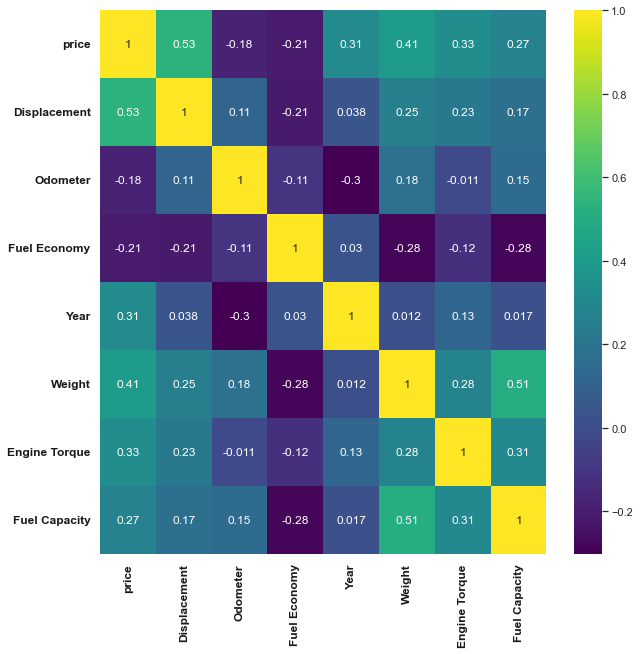

In [101]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

# Chuẩn hóa dữ liệu

Chuẩn hoá Min-Max

In [102]:
min_max=MinMaxScaler()
df_minmax =pd.DataFrame(min_max.fit_transform(data),columns
=data.columns)
df_minmax
# df_minmax.info()
# df_minmax.describe()

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity
0,0.325674,0.031670,0.000381,0.619724,1.000000,0.416302,0.442066,0.555556
1,0.890957,0.473271,0.000054,0.500000,1.000000,1.000000,0.923077,0.555556
2,0.947485,0.473271,0.000882,0.500000,1.000000,1.000000,0.879121,0.555556
3,0.325674,0.487205,0.014746,1.000000,1.000000,0.000000,0.956044,0.444444
4,0.198598,0.063086,0.221711,0.619724,1.000000,0.416302,0.600000,0.071111
...,...,...,...,...,...,...,...,...
1459,0.031161,0.365355,0.016336,0.619724,0.659091,0.416302,0.442066,0.444444
1460,0.135032,0.101343,0.100196,0.619724,0.863636,0.416302,0.628571,0.255556
1461,0.004452,0.038004,0.087127,0.619724,0.840909,0.416302,0.956044,0.555556
1462,0.117226,0.252850,0.118711,0.619724,0.590909,0.000000,0.600000,0.533333


# Áp dụng mô hình Linear đa biến để dự đoán

(980, 7)
(484, 7)
(980,)
(484,)
The RMSE: 0.1546
The r2 score: 45.78 %


<AxesSubplot:xlabel='price'>

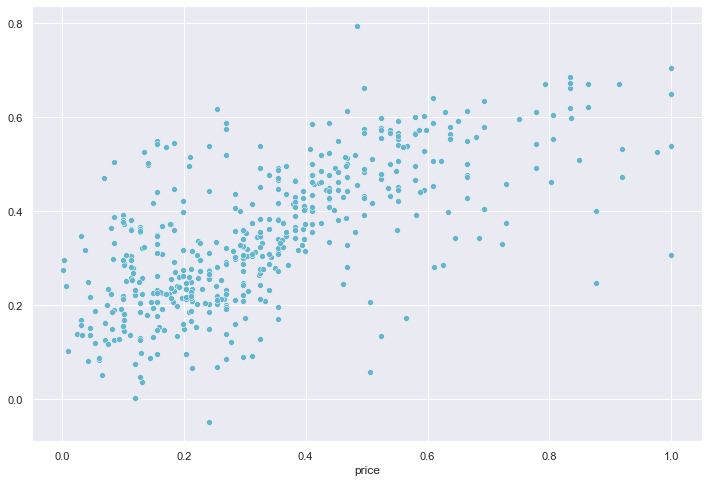

In [114]:
X = df_minmax.drop(["price"], axis=1)
Y = df_minmax["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
compare_df = pd.DataFrame({
    "Target" : Y_test,
    "Prediction" : predictions
})
compare_df.sample(10)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"The RMSE: {rmse:.4f}")
r2 = r2_score(Y_test, predictions)
print(f"The r2 score: {r2 * 100:.2f} %")
plt.figure(figsize=[12,8])
sns.scatterplot(Y_test, predictions, color='c')

# Áp dụng K-Means

Sử dụng phương pháp chọn K bằng elbow:

    - Distortion: Trung bình cộng phương khoảng cách giữa tâm cụm đến các điểm còn lại.
    - Chọn K mà khi tăng giá trị của nó thì giá trị Distortion cón xu hướng đi ngang hoặc giảm không đáng kể

In [104]:
k = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_minmax[['price','Displacement','Odometer','Fuel Economy','Year','Weight','Engine Torque','Fuel Capacity']])
    k.append(kmeans.inertia_)

elbow_df = pd.DataFrame(index=range(1,30),data=k).reset_index()
elbow_df = elbow_df.rename(columns={'index':'Number_of_clusters',0:'Sum_of_intra_cluster_squares'})

<AxesSubplot:xlabel='Number_of_clusters', ylabel='Sum_of_intra_cluster_squares'>

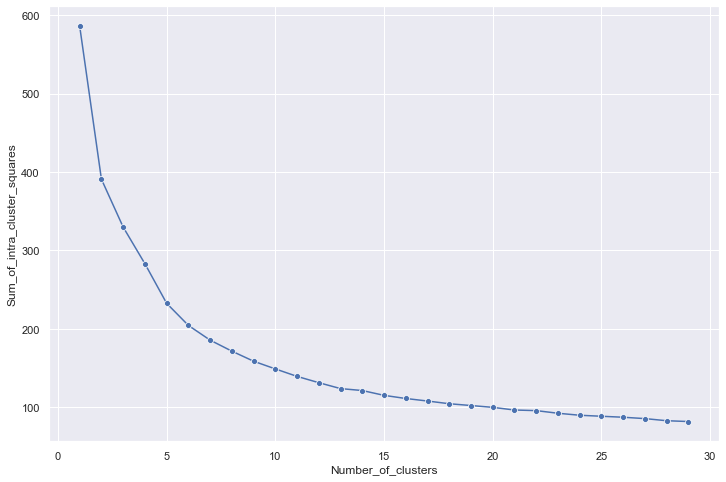

In [105]:
plt.figure(figsize=(12,8))
sns.lineplot(x=elbow_df.Number_of_clusters, y=elbow_df.Sum_of_intra_cluster_squares, marker='o')

=> Chọn k = 20

Thực hiện K-means với k=20

In [106]:
kmeans = MiniBatchKMeans(n_clusters=20,
                          random_state=0,
                          batch_size=10)

y_pred = kmeans.fit_predict(df_minmax[['price','Displacement','Odometer','Fuel Economy','Year','Weight','Engine Torque','Fuel Capacity']])

In [107]:
df_kmeans = df_minmax.copy()
df_kmeans['k_means_clusters'] = pd.Series(y_pred)
df_kmeans

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity,k_means_clusters
0,0.325674,0.031670,0.000381,0.619724,1.000000,0.416302,0.442066,0.555556,4
1,0.890957,0.473271,0.000054,0.500000,1.000000,1.000000,0.923077,0.555556,2
2,0.947485,0.473271,0.000882,0.500000,1.000000,1.000000,0.879121,0.555556,2
3,0.325674,0.487205,0.014746,1.000000,1.000000,0.000000,0.956044,0.444444,11
4,0.198598,0.063086,0.221711,0.619724,1.000000,0.416302,0.600000,0.071111,4
...,...,...,...,...,...,...,...,...,...
1459,0.031161,0.365355,0.016336,0.619724,0.659091,0.416302,0.442066,0.444444,7
1460,0.135032,0.101343,0.100196,0.619724,0.863636,0.416302,0.628571,0.255556,4
1461,0.004452,0.038004,0.087127,0.619724,0.840909,0.416302,0.956044,0.555556,17
1462,0.117226,0.252850,0.118711,0.619724,0.590909,0.000000,0.600000,0.533333,9


### Áp dụng LinearRegression cho mô hình sau khi đã chia cụm

 Tách cột k_means_clusters

In [108]:
data_temp = df_kmeans.copy()
for i in range(0,20):
  colums = 'k_means_clusters_' + str(i)
  data_temp[colums] = (data_temp['k_means_clusters'] == i)*1
data_temp

,price,Displacement,Odometer,Fuel Economy,Year,Weight,Engine Torque,Fuel Capacity,k_means_clusters,k_means_clusters_0,...,k_means_clusters_10,k_means_clusters_11,k_means_clusters_12,k_means_clusters_13,k_means_clusters_14,k_means_clusters_15,k_means_clusters_16,k_means_clusters_17,k_means_clusters_18,k_means_clusters_19
0,0.325674,0.031670,0.000381,0.619724,1.000000,0.416302,0.442066,0.555556,4,0,...,0,0,0,0,0,0,0,0,0,0
1,0.890957,0.473271,0.000054,0.500000,1.000000,1.000000,0.923077,0.555556,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0.947485,0.473271,0.000882,0.500000,1.000000,1.000000,0.879121,0.555556,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0.325674,0.487205,0.014746,1.000000,1.000000,0.000000,0.956044,0.444444,11,0,...,0,1,0,0,0,0,0,0,0,0
4,0.198598,0.063086,0.221711,0.619724,1.000000,0.416302,0.600000,0.071111,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.031161,0.365355,0.016336,0.619724,0.659091,0.416302,0.442066,0.444444,7,0,...,0,0,0,0,0,0,0,0,0,0
1460,0.135032,0.101343,0.100196,0.619724,0.863636,0.416302,0.628571,0.255556,4,0,...,0,0,0,0,0,0,0,0,0,0
1461,0.004452,0.038004,0.087127,0.619724,0.840909,0.416302,0.956044,0.555556,17,0,...,0,0,0,0,0,0,0,1,0,0
1462,0.117226,0.252850,0.118711,0.619724,0.590909,0.000000,0.600000,0.533333,9,0,...,0,0,0,0,0,0,0,0,0,0


Tạo tập dữ liệu Train và Test

In [109]:
X = data_temp.drop(["price","k_means_clusters"], axis=1)
Y = data_temp["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(980, 27)
(484, 27)
(980,)
(484,)


In [110]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

So sánh kết quả tính toán và kết quả thực tế

In [111]:
predictions = model.predict(X_test)
compare_df = pd.DataFrame({
    "Target" : Y_test,
    "Prediction" : predictions
})
compare_df.sample(10)

,Target,Prediction
599,0.523523,0.136928
709,0.325645,0.342507
797,0.283278,0.320125
258,0.664844,0.689442
994,0.291757,0.402010
887,0.240881,0.092882
1319,0.728253,0.623184
1456,0.120193,0.295944
941,0.240881,0.173759
718,0.433078,0.373509


Đánh giá mô hình bằng thông số RMSE và R2







In [112]:

rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"The RMSE: {rmse:.4f}")
r2 = r2_score(Y_test, predictions)
print(f"The r2 score: {r2 * 100:.2f} %")

The RMSE: 0.1021
The r2 score: 76.36 %


<AxesSubplot:xlabel='price'>

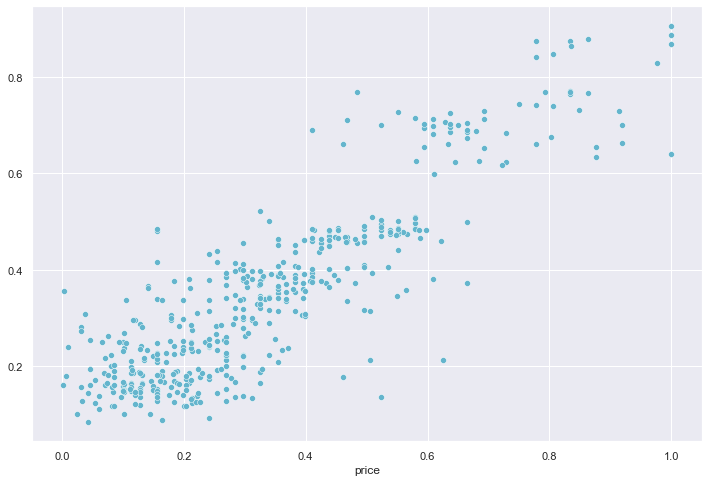

In [113]:
plt.figure(figsize=[12,8])
sns.scatterplot(Y_test, predictions, color='c')